In [50]:
csv_file = "/home/tlips/Code/few-shot-keypoints/results/SPAIR-support-sets/SPAIR-support-sets.csv"

import pandas as pd

df = pd.read_csv(csv_file)

df.head()


# drop results_json_path column and test_dataset_path
df = df.drop(columns=["results_json_path", "test_dataset_path"])
df["image_PCK"] = df["image_PCK"] * 100

df.head()





,featurizer,category,N_support_images,image_PCK,median_keypoint_distance,average_keypoint_distance
0,dino,dog,4,69.800599,11.967721,27.521851
1,dino,dog,4,62.025050,19.854959,41.054164
2,dino,dog,4,57.507631,19.211171,49.338857
3,dino,dog,4,67.922724,14.852079,29.834327
4,dino,dog,4,63.268731,14.671722,44.426500


In [51]:
local_df = df[df["N_support_images"] == 1]
local_df = local_df[local_df["category"] == "car"]
local_df

,featurizer,category,N_support_images,image_PCK,median_keypoint_distance,average_keypoint_distance
200,dino,car,1,53.079078,33.066220,83.733724
201,dino,car,1,56.182504,27.419615,75.434497
202,dino,car,1,58.154371,24.428333,74.895038
203,dino,car,1,59.066175,24.459867,73.151049
204,dino,car,1,51.313732,32.335112,88.254723
470,dift,car,1,48.181201,40.931010,99.365755
471,dift,car,1,55.063612,24.121576,86.333114
472,dift,car,1,57.183545,19.709799,83.046001
473,dift,car,1,57.398861,20.121403,83.806574
474,dift,car,1,51.815568,28.891668,89.267477


,image_PCK,median_keypoint_distance,average_keypoint_distance
N_support_images,,,
1,54.124465,30.229078,63.961702
2,54.261800,30.481453,63.041750
4,54.873823,29.549757,62.260622


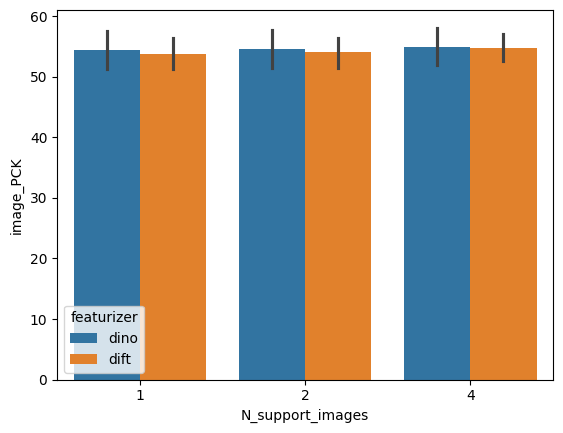

In [52]:
# barplot for different values of N_support images averaged across all featureizers and categories

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# add error bars
sns.barplot(x="N_support_images", y="image_PCK", hue="featurizer", data=df)

# print corresponding df 

this_df = df.groupby(["N_support_images"]).mean(numeric_only=True)
this_df









<Axes: xlabel='featurizer', ylabel='image_PCK'>

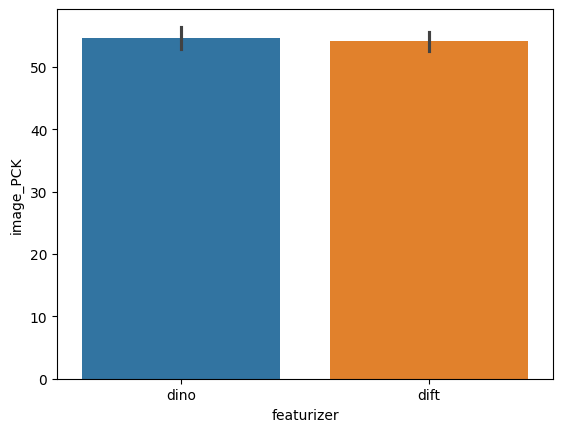

In [53]:
# now split across featurizers  
sns.barplot(x="featurizer", y="image_PCK", hue="featurizer", data=df)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'dog'),
  Text(1, 0, 'boat'),
  Text(2, 0, 'bus'),
  Text(3, 0, 'motorbike'),
  Text(4, 0, 'chair'),
  Text(5, 0, 'cat'),
  Text(6, 0, 'bicycle'),
  Text(7, 0, 'train'),
  Text(8, 0, 'horse'),
  Text(9, 0, 'tvmonitor'),
  Text(10, 0, 'person'),
  Text(11, 0, 'sheep'),
  Text(12, 0, 'bottle'),
  Text(13, 0, 'car'),
  Text(14, 0, 'cow'),
  Text(15, 0, 'aeroplane'),
  Text(16, 0, 'bird'),
  Text(17, 0, 'pottedplant')])

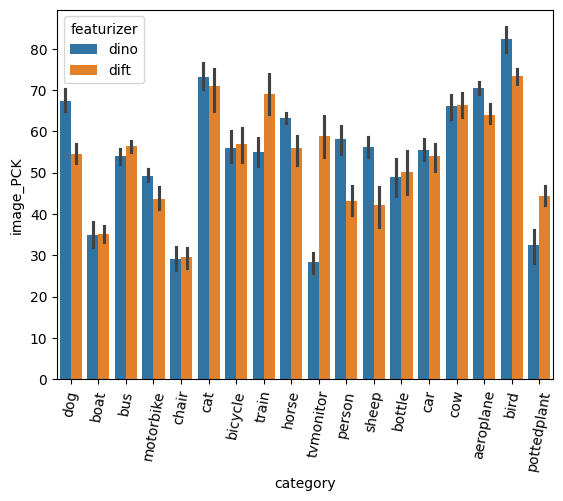

In [54]:
# only take those with N=1
local_df = df[df["N_support_images"] == 1]
sns.barplot(x="category", y="image_PCK", hue="featurizer", data=local_df)
# vertical xlabels
plt.xticks(rotation=80)


,image_PCK,median_keypoint_distance,average_keypoint_distance
N_support_images,,,
1,54.743865,27.548460,83.728795
2,52.056792,31.792811,87.165732
4,54.223841,28.495973,83.747312


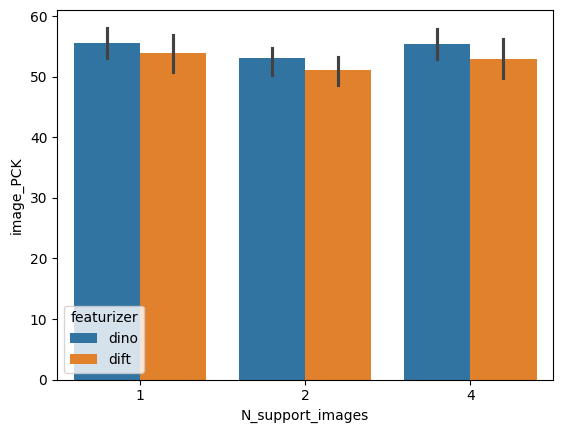

In [55]:
# barplot for different values of N_support images averaged across all featureizers and categories

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


local_df = df[df["category"] == "car"]
# add error bars
sns.barplot(x="N_support_images", y="image_PCK", hue="featurizer", data=local_df)

# print corresponding df 

this_df = local_df.groupby(["N_support_images"]).mean(numeric_only=True)
this_df